# Python basics 2 + Input / Output

This notebook contains more basics of Python. Use it as a reference whenever needed.

## Python Syntax

### The Significant Whitespace

Most program languages use characters (e.g. `{...}`) or keywords (e.g. `begin ... end`) to delimitate blocks of codes. But, when writing Python code, you rely on **indentation** to structure your programs. 

All programming languages allow you to indent (and you should!), but in Python you **have to.** Otherwise, you'll receive an IndentationError and your code won't work!

#### How Indentation Works

- All statements with the same distance from the left border belong of the same block of code. This is related to the _scope_ of your code. 
- Sub-blocks are more indented, while the block ends at the line less indented.
- It is recommended to use **4 spaces** per indentation level. However, a tab character (`\t`) can also be used. Often, you have a setting in your favorite editor that automatically translates tabs to 4 spaces. 
- When a statement is too long, it's good practice to avoid lines of code longer than 79 characters, it can be split with `"\"` at the end of the line.
- **Never mix** spaces and tabs in a single source file. This will raise an error when you try to execute the code, but is also very hard to spot by hand. To help you, you can set your text editor to display whitespace characters.


#### Recommended Reading on Python syntax and style
[PEP 8 - Style Guide for Python Code](https://www.python.org/dev/peps/pep-0008/)

##### The code is way more readable:


```python
# input() reads from standard input (e.g. keyboard)
n_string = input('Enter a number, please:')

if not n_string.isdigit():
    print("This isn't a number...")
else:
    n = int(n_string)
    if n == 0:
        print("Zero? Why zero?")
    elif n % 2 == 0:
        print("Even")
    else:
        print("Odd")
```

## Conditional statements, loops and functions

Up till now, you've used the Python language and syntax as a fancy calculator. Most likely you felt that you needed additional elements to prevent replication in your code, or saw that you needed a conditional statement that only executed your code when a particular variable/statement was True/False. 

Below are the building blocks for writing such code blocks introduced. Let's take a look at conditional statements first.

## Conditional Statements

A lot of programming has to do with executing a block of code only if a certain condition is verified. 

In Python, the `if-then-else` construct has the form:

```python
if condition1:
    # statements
elif condition2:
    # statements
elif condition3:
    # statements
else:
    # statements
```

Note that the `elif` and `else` clauses are optional. A conditional statement can contain a single `if` block, and nothing else.

All methods from the previous notebook that return a boolean (True/False) can be used after an `if` statement. You can of course combine these with the `and` and `or` operators. 

If you inspect the function below, do you think you can change the `elif` statement into an `if` statement? Would this alter the code? What is the difference? Try playing with the code by adding some `Pear` to the grocerylist. 

Can you describe what the code is doing?

In [ ]:
fruit = ["Apple", "Pear", "Banana", "Orange"]

item = "Pear"

# To remind you that you can check for elements in a list
if item in fruit:
    print("Already on the list!")
    
    if fruit.count(item) >= 3:
        print("It's on the list three times or more!")
    elif fruit.count(item) > 1:
        print("It's on there twice!")
    # You don't have to finish with an 'else'
    
else:
    print("Not on the list yet, adding it!")
    fruit.append(item)


### Quiz

Finish the following code block. The `intput()` function askes the user in the Python interpreter to input some text. Implement the following:

    * Print a line with a friendly message, telling the user what their input is
    * Check if the input is a digit
    * Check if the input meets the > 0 condition 
    * If the input is a digit and meets the condition, tell the user if it is even or odd
    * Otherwise, print another informative message 




In [ ]:
user_digit = input("A number > 0 please: ")
# Your code here


## Flow control / Looping

### For Loops

Programming is of little use if we cannot repeat an instruction for an intended number of times. In the previous examples, you had to change the code and re-run in if you wanted to play with, for instance, the value of the `item` variable. 

The `for` statement allows us to define **iterations** (i.e.taking items from an iterable) by following this template:

```python
for variable in sequence:
	# statements
    print(variable)
```

Little known fact is that the for-loop also has an `else` clause. It's also rarely used:

```python
for number in [0, 1, 2, 3, 4, 5]:
	# statement
    print(number)
    
    if number > 4:
        break
        
else:
	# statement
    print("All done!")
```

The code in the optional `else` clause is executed if and only if the loop terminates successfully (i.e. without a **`break`**). 

In [ ]:
# Let's iterate over our list of fruit

for item in fruit:
    print(item)

In [ ]:
# Or from another function we recall

text = "Lorem ipsum dolor sit amet, consectetur adipiscing elit"
words = text.split()

for word in words:
    print(word.title())

In [ ]:
# You can also nest for loops:
text = "Lorem ipsum dolor sit amet, consectetur adipiscing elit"
words = text.split()

for word in words:
    for character in word:
        print(character, end='-')  # What is the 'end' argument doing?

#### The enumerate function

The `enumerate()` is problably the most used among the functions that supports the iteration of an iterable. This function return the current item plus **its index** in the iteration process.

You can see that we assign two variable names, `i` and `word` to the outcome of `enumerate()`. 
What is the datatype that this function is returning? 
And what are the datatypes of its elements?

In [ ]:
# Use enumerate in the iteration over a list of words
text = "Lorem ipsum dolor sit amet, consectetur adipiscing elit."
words = text.split()

for i, word in enumerate(words):
    print (i, "-->", word)

In [ ]:
# What is the datatype of the returning value of enumerate(words)?
index_words = enumerate(words)
index_words = list(index_words)
index_words

Optionally, you can make the `enumerate()` function start at another number:

In [ ]:
for i, word in enumerate(words, 98):
    
    if i > 100:
        break
    # No else here?
    
    print(i, word)

#### The range construct

The  `range()` construct can be used to control the iteration. It generate lists of numbers on the basis of the following three arguments:

- `start` : the first integer of the list
(default is 0)
- `stop` : one larger the last integer of the list (list stop at n - 1)
- `step`: the increment of the list (default is 1)

In [ ]:
# Let's play with range
print(range(0,10))
print(range(10))
print(range(1,10,2))

This each prints the function name with its arguments. Not very informative at this point...

Similar to the call with the `list()` function above, we first have to transform the outcome of this function to a list to make it printable. This happens for some efficient functions that don't put everything in memory at once, but only during each iteration (when you run the code). So basically, the `range()` function produces a list of numbers.

In [ ]:
print(list(range(100, 1, -10)))  # You can make it reverse with a negative step!

In [ ]:
# Let's use range in a for loop

for i in range(1, 10, 2):
    print(i)

### While Loops

The `while` statement allows us to control a loop on the basis of a condition. 

A `while` loop runs as long as a condition is verified. 

It has the following general form:

```python
while condition:
	# statement
else:
	# statement
```

the code in the optional `else` clause is execute if and only if the loops terminates successfully (i.e., without a **`break`**)

### Quiz

_Think before doing._ What do you think happens when you execute?

```python

n = 1

while n:
    print(n)
    n += 1
```

If you dare, you can execute this code. **Do this in a terminal window  instead of this notebook!**

More safe is the code below, this does not let you end up in an _infinite loop_. Try executing the code a couple of t imes and see what it does. What is your longest streak of odd numbers?

In [ ]:
import random

n = 1
while n % 2 != 0:
    n = random.randrange(99)
    print(n)

---

### Break and Continue

The clauses `break` and `continue` are two statements that allow for a more flexible control of a loop. Intuitively:

- `continue` is used to pass to the next iteration of the loop
- `break` is used to interrupt the loop abruptly

In [ ]:
# When we encounter 7 we skip to the next step
for el in range(1, 10, 2):
    if el == 7:
        continue
    print(el)

In [ ]:
# When we encounter 7 we stop our loop 
for el in range(1, 10, 2):
    if el == 7:
        break
    print(el)

The `break` influences the execution of the loop in yet another way: when a loop terminates due to a `break` statement, the code embedded in the option `else` clause is skipped.

In [ ]:
# The continue statement does not influence the execution of the else block
for el in range(1, 10, 2):
    if el == 7:
        print ("(let's ignore the " + str(el) + ")")
        continue
    print(el)
else:
    print (">>> the iteration ended with the number " + str(el))

In [ ]:
# What if we replace continue with break
for el in range(1, 10, 2):
    if el == 7:
        print ("(we encountered the number " + str(el) + ", let's break the loop)")
        break
    print(el)
else:
    print (">>> the iteration ended with the number " + str(el))

### The Pass Statement

Given the importance of indentation for Python, sometimes we may need a placeholder that allows us to write down a condition for an `if-then-else` construct or for a `while` loop without writing any statement (maybe just a comment). This is the case in which the `pass` statement comes in handy. 

In what follows, **nothing happens**:

```python
if condition1:
    pass
else:
    pass
```


In [ ]:
numbers = range(10)

# Handy if you're quickly typing a loop
# or function (see further on in this notebook)

for n in numbers:
    if n % 2 == 0:
        pass  # TODO
    else:
        print("Odd!")

---

### List Comprehensions (advanced)

A list comprehension is a syntactic construct that allows us to create lists by applying a function on another list, in just **one line** of code. 

Even if the reverse isn't always true, list comprehensions can always be (inefficiently) expressed as loops. We will exploit this family resemblance for introducing this construct.

In what follows, we start with a list of numbers and we want to square all of its elements and save our final values in a new list.

In [ ]:
# Our source list
source_list = [1,2,3,4,5,6,7,8,9]

In [ ]:
# We can solve this problem with a for loop...
final_list = []

for el in source_list:
    final_list.append(el ** 2)

print(final_list)

In [ ]:
# But this can also be done in one line
final_list = [el ** 2 for el in source_list]

print(final_list)

These list comprehensions cary the form of:
    
```python
[i.method() for i in items]
```

**Conditional statements may be implemented**

In what follows we want to ignore all the odd numbers

In [ ]:
# We can solve this problem with a for loop...
final_list = []

for el in source_list:
    if el % 2 == 0:
        final_list.append(el ** 2)

print(final_list)

In [ ]:
# ... or by using list comprehension
final_list = [el ** 2 for el in source_list if el % 2 == 0]

print(final_list)

**If you want to implement an else clause the syntax changes slightly**

In what follows we want to leave the odd numbers unchanged

In [ ]:
# we can solve this problem with a for loop...
final_list = []

for el in source_list:
    if el % 2 == 0:
        final_list.append(el ** 2)
    else:
        final_list.append(el)

print(final_list)

In [ ]:
# ... or by using list comprehension
final_list = [el ** 2 if el % 2 == 0 else el for el in source_list]

print(final_list)

### Quiz

The following list contains 100 random extractions (with replacement) of numbers between 1 and 15. 

Find the number that has never been extracted

In [ ]:
random_numbers = [1, 2, 1, 1, 9, 13, 15, 5, 9, 8, 12, 14, 3, 2, 8, 10, 3, 12, 15, 13, 5, 3, 7, 5, 2, 13, 12, 8, 10, 5, 15, 8, 2, 8, 5, 12, 9, 2, 3, 5, 1, 4, 5, 9, 13, 2, 12, 5, 10, 8, 1, 15, 15, 6, 12, 3, 1, 3, 7, 14, 15, 10, 15, 7, 10, 12, 1, 2, 13, 7, 9, 6, 6, 7, 4, 12, 10, 8, 8, 3, 8, 4, 6, 14, 10, 5, 2, 3, 15, 4, 9, 3, 7, 7, 2, 4, 4, 1, 7, 15]

In [ ]:
# Your code here



---

# Input / Output

We now discussed the art of looping, to automate bits of your code and prevent repetition. If you know that you're going to use parts of your code more than once, you can make a function out of it. Functions are constructs that allows us to organize portions of code more than once in a program. The alternative way to obtain the same results without functions would be to copy the same portion of code every time it is needed. Organizing your code with functions makes it easier to split your problem into smaller subproblems.

We have seen plenty of built-in functions so far. If you used them, you could have recognized them by their parenthesesis after their name. The `print()` functions is such an example. 

A function **takes optional parameters** (inside the parenthesis) and **optionally returns a value** after it has done something. 

## Functions

Functions in Python are defined by a `def` statement, following this template:

```python

def function_name(parameters):
    """
    Documentation on what the function is doing
    """
    
    # your statements
    result = True
    
    return result
```

> The list of the parameters required by the function is reported between round brackets right after the name of the function. Each function may have **zero or more** parameters. When a function is called, its parameters are called **arguments**.
>
> The (optional) documentation string should be placed immediately after the function definition. There are many way to format your **docstring**, [PEP 287](https://www.python.org/dev/peps/pep-0257/) recommends reStructuredText, but more formats are available. See [this tutorial](http://daouzli.com/blog/docstring.html) for an introduction to the topic.
>
> The **indented** function body contains all the statements that are executed every time the function is called. When a `return` statement is executed, the function exits and its output is the argument of the `return` statement. 
>
> When there is no return statement in the body function, or when a return statement with no arguments is executed, the function  returns `None`

For instance, the following function calculates the number of characters in a string:

In [ ]:
def chars(s):
    """
    Calculate the number of characters in a string
    """
    
    if type(s) != str:
        return "This is not a string!"
    
    r = len(s)
    
    return r

The docstring is saved into a  `__doc__` variable and can be accessed by using the `help()` function or the IPython `?`

In [ ]:
# Don't use this, it is just to make the point
print(chars.__doc__)

In [ ]:
# Use one of this two
help(chars)
chars?

Or keep using the `shift + tab` ipython magic!

In [ ]:
chars('test')

In order to execute the code included in a function, you have to **call the function**, either in your script or in the interactive shell. For instance:

In [ ]:
chars("voodoo")

In [ ]:
chars(1979)

The `return` is also optional. What happens when you assign a variable to a function call that does not have a return statement? 

In [ ]:
def tokenize(text):
    words = text.split()
    
    print(words)
    
    # Forgot something?
    
words = tokenize("What happens when there is no return keyword?")

print(type(words))

Sometimes, you don't need a return statement, as you're for instance writing a function as some kind of wrapper function, that ties several methods together. Or write the output to a file, instead of to the console. It's best to make clear in the docstring/documentation of the function (using the `""" """` docstring style) what the function takes in, processes, and spits out again. 

### Parameters

A function can receive any number of parameters:

In [ ]:
def higher(n1, n2, n3):
    """
    Find the higher of three numbers
    """
    
    if n1 > n2 and n2 >= n3:
        return n1
    
    if n2 >= n3:
        return n2
    
    else:
        return n3

In [ ]:
# A parameter can be passed either by position
higher(4, 2, 8)

In [ ]:
# Or by name/keyword
higher(n3=8, n1=4, n2=2)

#### Optional Parameters

In some situation it may be useful to have a default parameter value, that is used when a call leaves an arguments **unspecified**.

In [ ]:
def higher(n1, n2=0, n3=0):
    """
    Find the higher of three numbers
    """
    
    if n1 > n2 and n2 >= n3:
        return n1
    if n2 >= n3:
        return n2
    else:
        return n3

In [ ]:
higher(9,4)

But what happens now:

In [ ]:
higher(-6, -3)  # How to fix this? 

#### Arbitrary Number of Parameters

A different situation is when we want our function to have an unspecified number of parameters. Python functions admit the so-called "tuple references", marked by an asterisk `*` in front of the last parameter  (that becomes a `tuple`).

In [ ]:
def print_params(*params):
    print ("your input:")
    print (params)

In [ ]:
print_params("Down from my ceiling", "Drips great noise", "It drips on my head through a hole in the roof") 

---

#### Quiz

Remember the grocery list. Can you write a function that:
* Takes *one or multiple* items as arguments
* Takes in an existing dictionary of groceries (keys) and counts (values)
* Adds the single (or multiple items) to this dictionary if it is not yet in there and update the count if it is
* Returns this (updated) dictionary

In [ ]:
groceries = {
    'kiwi': 8,
    'bread': 2,
    'banana': 3,
    'soy sauce': 1,
    'red wine': 1,
    'soup': 1
}

# Your code here




---

## Modules and Packages

Python modules are groupings of related code that are structures as to facilitate its re-use. 

Physically, modules are `.py` files implementing a set of **functions, classes or variables**, as well as **executable statements**, that can be accessed from other modules by using the `import` command.

The `import` command can be used both to import **the whole code** of a module, using the following syntax:

```python
import module
```

or just **specific attributes** (one or more functions, variables, classes or a combination of these) with the following syntax:

```python
from module import name1, name2, name3
```

For example, if order to know what is our current working directory, we can use the function `getcwd()` available `os` module (see below) in two different ways:

In [ ]:
import os
os.getcwd()

In [ ]:
from os import getcwd
getcwd()

You can think of a **package** as a structured collection of Python modules.

There are some modules/libraries available in Python as built-in. Take a closer look at three of them:
    
- Math ([manual](https://docs.python.org/3/library/math.html))
- Collections ([manual](https://docs.python.org/3/library/collections.html))
- Itertools ([manual](https://docs.python.org/3/library/itertools.html))

Can you figure out when to use the `defaultdict` and `Counter` from the Collections library? Can you use them in any of the functions/code you wrote above?

In [ ]:
# Example

from collections import Counter

# Your code here

---

## File Input/Output

A huge portion of our input data will come from files on disk, and a lot of our work will be saved in memory. So, mastering the art of reading and writing is crucial even in programming.

### Files in Colab

In these examples, we will work with a file referred to as "data/adams-hhgttg.txt". This means there should be a directory called "Data" and inside of that there should be the file "adams-hhgttg.txt". You will find this in the course repository in the Notebooks directory. Obtain this file either by downloading the course repository and finding it there, or opening it on Github and saving the raw file.

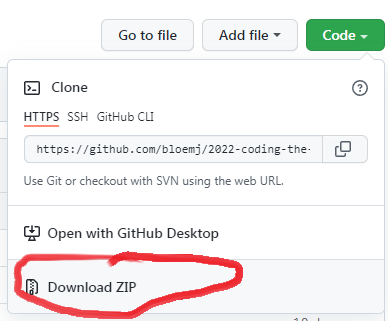

In Colab, you can view and edit the file system by clicking on the "Files" icon on the left side. You will see the file system of your Colab session there with a directory called "sample_data". You can make directories and upload files here.


Normally, you cannot upload a directory full of files, but there is a trick, which we will use here: you can upload zip files (containing multiple files and directories) and then unzip them.

Find the "data" directory in the repository that you downloaded, and compress (zip) it. 

On Windows, this is unintuitively done by sending it to a compressed folder:

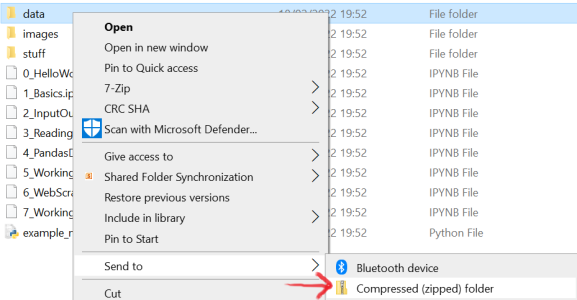


On Apple, it is done by right-clicking on "folder name" and choosing the option 'Compress "folder name"'

Then, in Colab's Files window, click "Upload to session storage" and upload your new zip file. 

Next, you can unzip it by running this code:

In [ ]:
!unzip data.zip

(This assumes your file is named data.zip, change the command if not)

Now, you will have the directory with the data files of the course in your Colab session, but Colab doesn't always show the change immediately. **If you do not see it yet, click the "Refresh" button** (next to the Upload to session storage button) to show the change you just made. You should now have a directory called "Data" in your session and inside of that there should be the file "adams-hhgttg.txt", among other files.

**Important note**: Colab sessions are temporary - the next time you load Colab to work on this notebook, you will have to upload your Data zip file and unzip it again.

#### Manually creating folders and files

Besides the "sample_data" and "data" that you now have, you can make another directory by right-clicking somewhere in this file system window and choosing "New folder". For example, create a folder called Stuff for your code's output.

#### Permanently saving your files: Google Drive

There is also a more permanent solution, which is to link your Google Drive to your Colab session. You can do it by clicking the "Mount Drive" button in the Files window, or with this code:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In the Files window, you will now see an additional directory called Drive. In this directory will be the contents of your Google Drive. If you put your data there, for example in a directory called "data", you will be able to access this from Colab. It will be located on the path `drive/data/file.txt`. Anything you put on Google Drive will still be there next time you open Colab, as long as you link your session to Google Drive again.

### Opening a file

The following code opens a file in our filesystem, prints the first 10 lines and closes the file. Please note that this file must exist in your Colab session (when running on Colab) on your computer (when running locally).

If you are working locally and you have only have downloaded this notebook, go back to the repository and download the file to the appropriate path (or change the path below). 

**Please note:** The code below shows you how the `open()` function works. It's better to use a `with` block (see below), which does this opening and closing for you.

In [ ]:
infile = open('data/adams-hhgttg.txt', 'r', encoding='utf-8')
#If you have put the file somewhere else, such as on your Drive, you should modify the path to open.
#For example to '/drive/data/adams-hhgttg.txt'. Otherwise, you will get a FileNotFound error when running this code.

for i, line in enumerate(infile):
    if i == 10:
        break
    print(line)

infile.close()

The key passage here is the one in which the `open()` function opens a file and return a **file object**, and it is commonly used with the following two parameters: the **name of the file** that we want to open, the **mode** and the **encoding**. 

- **filename**: the name of the file to open

- the **mode** in which we want to open a file: the most commonly used values are `r` for **reading** (default), `w` for **writing** (overwriting existing files), and `a` for **appending**. (Note that [the documentation](https://docs.python.org/3/library/functions.html#open) report mode values that may be necessary in some exceptional case)

- **encoding**: which mapping of string to code points (conversion to bytes) to use, more on this later. 

>**IMPORTANT**: every opened file should be **closed** by using the function `close()` before the end of the program, or the file could be unavailable to successive manipulations or for other programs.

There are other ways to read a text file, among which the use of the methods `read()` and `readlines()`, that would simplify the above function in:

```python
infile = open('data/adams-hhgttg.txt', 'r', encoding='utf-8')
text = infile.readlines()
print(text[:10])
infile.close()
```

However, these methods **read the whole file at once**, thus creating huge problems when working with big corpora.

In the solution we adopt here the input file is read line by line, so that at any given moment **only one line of text** is loaded into memory. 

### The with statement 

A `with` statement is used to wrap the execution of a block of code.

Using this construction to open files has three major advantages:

- there is no need to explicitly  close the file (the file is automatically closed as soon as the nested code exits)
- the file is closed automatically even when unhandled errors cause the program to crash
- the code is way clearer (it is trivial to identify where in the code a file is opened) 

Thus, you can  make it yourself a bit easier. Forget about the explicit `.close()` method. The code above can be rewritten as follows:

In [ ]:
with open('data/adams-hhgttg.txt', encoding='utf-8') as infile:
    
    lines = infile.readlines()
    
print(lines[:10])

The code in the indented with block is executed while the file is opened. It is automatically closed as the block is closed. 

### Quiz

* Write one function that takes a file path as argument and prints statistics about the file, giving:
    * The number of tokens
    * The number of unique tokens
    * The type:token ratio
    * The 10 most frequent words
* Write a normalization or cleaning function that pre-processes the text, by removing:
    * Uppercase
    * Punctuation
* Call the normalization function inside the main function. 

In [ ]:
file_path = 'data/adams-hhgttg.txt'

# Your code here

---

### Writing to files

Writing an output file in Python has a structure that is close to that we're ued in our reading examples above. The main difference are 

- the specification of the **mode** `w`


- the use of the function `write()` for each line of text

In [ ]:
with open('stuff/output-test-1.txt', 'w', encoding='utf-8') as outfile:
    
    outfile.write("My name is:")
    outfile.write("John")

Note that this code tries to write a file called "output-test-1.txt" to a directory called "stuff". If you do not have a directory called "stuff", it will give an error. Make a directory (folder) called "stuff" in your Colab file system or local file system in the same directory as the notebook, and try again.

> When writing line by line, it's up to you to take care of the **newlines** by appending `\n` to each line

In [ ]:
with open('stuff/output-test-2.txt', 'w', encoding='utf-8') as outfile:
    
    outfile.write("My name is:\n")
    outfile.write("Alexander")


We can inspect the file we just created with the command line. The following is not Python, but a basic command line tool to print the contents of a file. At least on Mac, Linux and Google Colab, this works. Otherwise, just navigate to the file and open it.

In [ ]:
!cat stuff/output-test-2.txt

### Looping through folders and files

We can use the `os` module to loop through a folder and load multiple files in memory.

In [ ]:
gutenberg_books = dict()

for root, dirs, files in os.walk("data/gutenberg-extension"):
    for file in files:
        
        with open(os.path.join(root,file), encoding='utf-8') as infile:
            gutenberg_books[file] = infile.read()

In [ ]:
gutenberg_books.keys()

In [ ]:
print(gutenberg_books['doyle-sherlock.txt'][:300])

Again, this requires you to have the folder 'data/gutenberg-extension' from the repository in your file system. Have a look at the "Files in Colab" section if you are trying to do this on Colab.

---

# Exercises

## Reading
TBD

## Tasks

### Exercise 1.

Find all words starting with a capital letter from the text in `text` below.

Make a list of the most frequent words in this text, but without the words 'the' and 'a'. 

In [ ]:
text = "Right, okay, so right around 9:00 she's gonna get very angry with me. Silence Earthling. my name is Darth Vader. I'm am an extra-terrestrial from the planet Vulcan. That's for messing up my hair. Um, well it's a delorean, right? You're George McFly."

# Your code here

### Exercise 2 

Write a function that:
* Takes a string as input
* Calculates the frequency of every token/word (separated by white space) in the string
* Returns a dictionary of tokens as keys and their frequency in the text as values.
* Implement an optional function parameter to make the function ignore capital letters

You can use everything you think you need and that you've learnt so far. Test it on the `text` variable value from the previous cell.

In [ ]:
# Your code here

### Exercise 3

Adapt the function in the previous exercise so that it also ignores punctuation. 

Hint: you can find all punctuation characters by calling:
        
```python
import string
print(string.punctuation)
```

In [ ]:
# Your code here

### Exercise 4
Remember the quiz from the previous notebook with the following code:
    
```python
homogeneous_list = ["1", "56", "33", "8", "220", "9"]
homogeneous_list.sort()
homogeneous_list
```

Try to fix this so that it sorts the list as if its elements were integers!

Can you then do the same for this list, so that Elephant is after canary?

```python
homogeneous_list = ["canary", "hippo", "kangaroo", "narwhal", "Elephant", "raccoon", "yak", "ant"]
homogeneous_list.sort()
homogeneous_list
```

In [ ]:
# Your code here

### Exercise 5

The [factorial](https://en.wikipedia.org/wiki/Factorial) of an integer $n$, defined as:

$$
n! = \begin{cases}
               1               & n = 1\\
               n * (n-1)! & \text{n > 1}
           \end{cases}
$$

is the product of all positive integers less than or equal to $n$. For example:

$$4! = 4 * 3 * 2 * 1$$

$$3! = 3 * 2 * 1$$

The factorial operation can be implemented in Python both as a recursive function and as an iterative functions. 

Write one factorial function picking the approach you prefer.

In [ ]:
# Your code here


### Exercise 6

Read the file `data/adams-hhgttg.txt` and:

- Count the number of lines in the file

- Count the number of non-empty lines

- Read each line of the input file, remove its newline character and write it to file `stuff/adams-output.txt`

- Compute the average number of alphanumeric characters per line

- Identify all the unique words used in the text (no duplicates!) and write them in a text file called `stuff/lexicon.txt` (one word per line)

In [ ]:
# your code here

with open("stuff/lexicon.txt", "w") as infile:
    infile.write("something")

In [ ]:
# Your code here

---